In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#Capstone 1 Corizo - NHANES Data Analysis  

##Step 1 : Load Data 
male = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=",", skip_header=1);
female = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", delimiter=",", skip_header=1);

Text(0.5, 0, 'Weight (kg)')

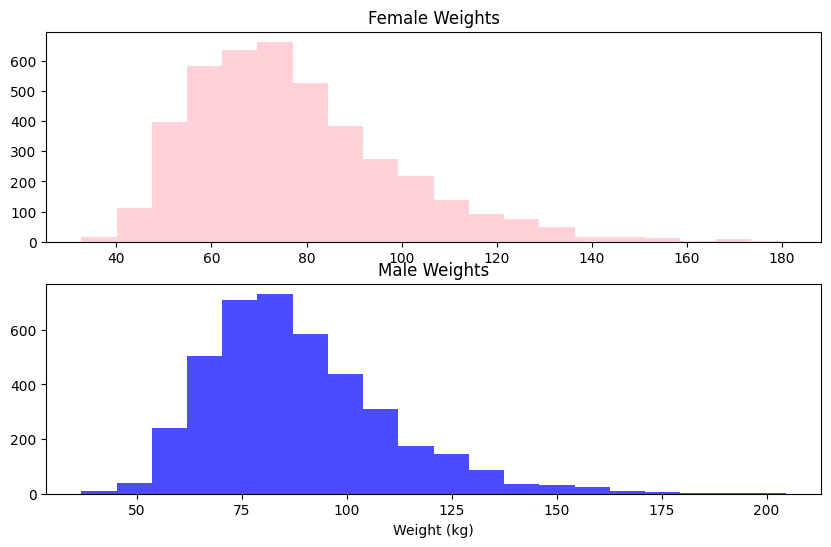

In [8]:
##Step 2 : Plot Histograms of Weights

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(female[:, 0], bins=20, color='pink', alpha=0.7)
plt.title("Female Weights") 

plt.subplot(2, 1, 2)
plt.hist(male[:, 0 ], bins=20, color='blue', alpha=0.7)
plt.title("Male Weights")
plt.xlabel("Weight (kg)")

<function matplotlib.pyplot.show(close=None, block=None)>

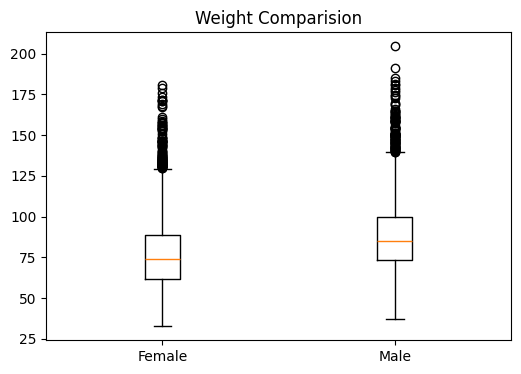

In [4]:
##Step 3: Boxplot Comparison 
# Replace NaNs column-wise
for i in range(female.shape[1]):
    female[:, i] = np.nan_to_num(female[:, i], nan=np.nanmean(female[:, i]))

for i in range(male.shape[1]):
    male[:, i] = np.nan_to_num(male[:, i], nan=np.nanmean(male[:, i]))

plt.figure(figsize=(6,4)) 
plt.boxplot([female[:, 0], male[:, 0]], tick_labels=["Female", "Male"])
plt.title("Weight Comparision")
plt.show

In [19]:
## Step 4: Compute Statistical Aggregates
print(f"Mean Female Weight: {np.mean(female[:, 0]):.2f} kg")
print(f"Mean Male Weight: {np.mean(male[:, 0]):.2f} kg")
print(f"Std Dev Female Weight: {np.std(female[:, 0]):.2f} kg")
print(f"Std Dev Male Weight: {np.std(male[:, 0]):.2f} kg")


Mean Female Weight: 77.40 kg
Mean Male Weight: 88.36 kg
Std Dev Female Weight: 21.54 kg
Std Dev Male Weight: 21.42 kg


In [15]:
print(np.isnan(female).sum(), "NaN values in female dataset")
print(np.isnan(male).sum(), "NaN values in male dataset")


7 NaN values in female dataset
7 NaN values in male dataset


In [17]:
female = np.nan_to_num(female, nan=np.nanmean(female))
male = np.nan_to_num(male, nan=np.nanmean(male))


In [21]:
## Step 5: Standardize Female Data
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)


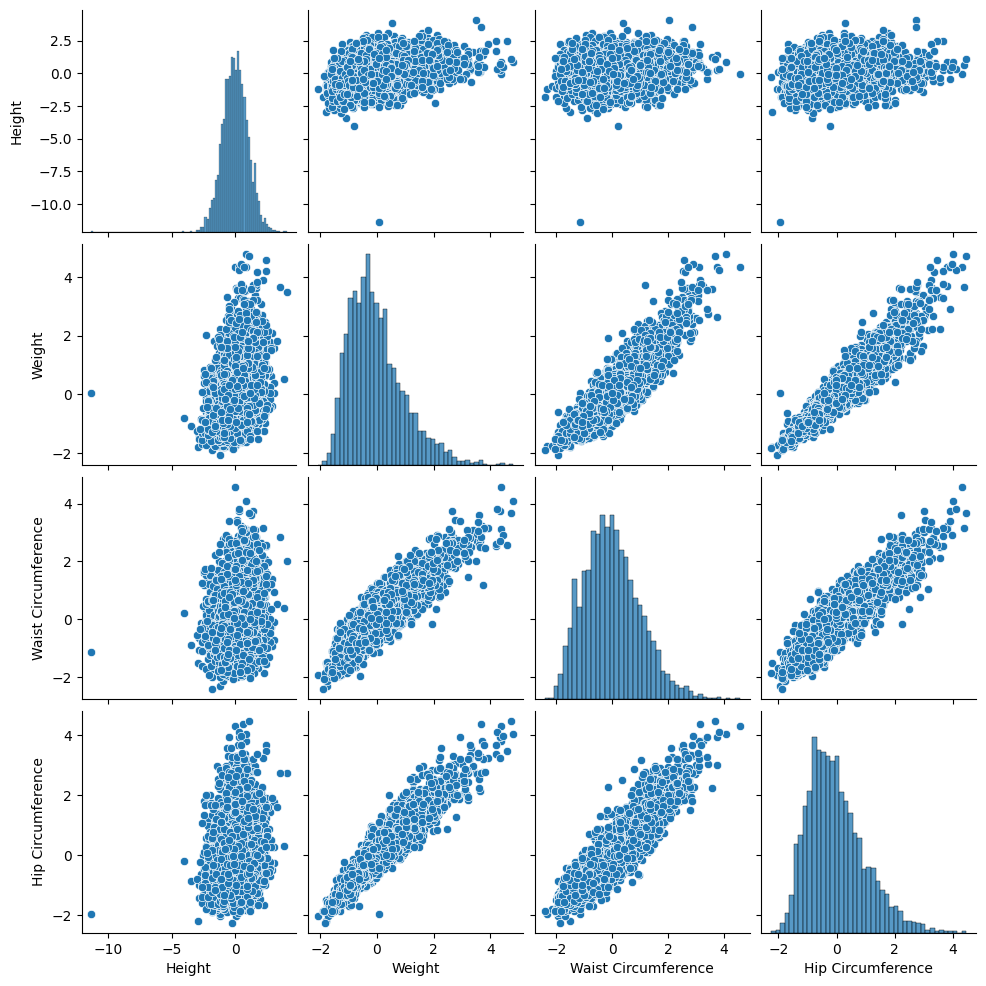

In [22]:
## Step 6: Scatter Plot & Correlation
cols = [1, 0, 6, 5]  # Height, Weight, Waist, Hip
columns = ["Height", "Weight", "Waist Circumference", "Hip Circumference"]
df_female = pd.DataFrame(zfemale[:, cols], columns=columns)
sns.pairplot(df_female)
plt.show()

In [18]:
print(female[:5])  # First 5 rows of female dataset
print(male[:5])  # First 5 rows of male dataset


[[ 78.72948523  78.72948523  78.72948523  78.72948523  78.72948523
   78.72948523  78.72948523]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9       ]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1       ]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.        ]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5       ]]
[[ 83.3380789  83.3380789  83.3380789  83.3380789  83.3380789  83.3380789
   83.3380789]
 [ 98.8       182.3        42.         40.1        38.2       108.2
  120.4      ]
 [ 74.3       184.2        41.1        41.         30.2        94.5
   86.8      ]
 [103.7       185.3        47.         44.         32.        107.8
  109.6      ]
 [ 86.        167.8        39.5        38.4        29.        106.4
  108.3      ]]


In [24]:
## Step 7: Compute Waist Ratios
female = np.column_stack((female, female[:, 6] / female[:, 1], female[:, 6] / female[:, 5]))
male = np.column_stack((male, male[:, 6] / male[:, 1], male[:, 6] / male[:, 5]))

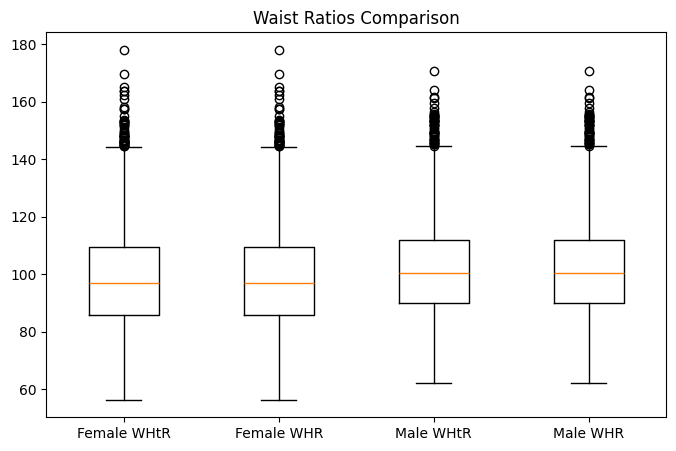

In [6]:
## Step 8: Boxplot for Ratios
plt.figure(figsize=(8, 5))

# Replace NaN values before plotting
female[:, 6] = np.nan_to_num(female[:, 6], nan=np.nanmean(female[:, 6]))
male[:, 6] = np.nan_to_num(male[:, 6], nan=np.nanmean(male[:, 6]))
plt.boxplot([female[:, 6], female[:, 6], male[:, 6], male[:, 6]], 
            tick_labels=["Female WHtR", "Female WHR", "Male WHtR", "Male WHR"])
plt.title("Waist Ratios Comparison")
plt.show()



In [26]:
## Step 9: Compare BMI
female_bmi = female[:, 0] / ((female[:, 1] / 100) ** 2)
sorted_indices = np.argsort(female_bmi)
print("Lowest 5 BMIs:", zfemale[sorted_indices[:5]])
print("Highest 5 BMIs:", zfemale[sorted_indices[-5:]])

Lowest 5 BMIs: [[-2.08004522 -1.20164196 -1.49479519 -1.14970815 -2.1796572  -2.03941232
  -1.9417857 ]
 [-1.88041631 -0.18371616 -1.65900658  0.37598658 -2.42732081 -1.85384342
  -2.05674062]
 [-1.53686889  1.78241449  0.59890003  0.55906995 -2.25041823 -1.67467345
  -1.7061281 ]
 [-1.84327605 -0.25343711 -0.22215692  0.49804216 -2.28579874 -2.25057693
  -1.8555695 ]
 [-1.61114942  0.87604221 -0.09899838  0.46752826 -2.19734745 -1.82824771
  -1.71187584]]
Highest 5 BMIs: [[  4.45664087   0.4995491    1.62522122  -1.11919425   3.32201297
    3.98197852   2.90356446]
 [  4.34986262   0.27644208   2.7336481    1.90168131   4.33035766
    3.91798924   3.75423092]
 [  4.80483083   0.87604221   2.03574969   1.77962573   3.74657915
    4.02037208   4.08185246]
 [  4.36379022  -0.03033008  -0.05794553  -0.17326352   2.75592472
    4.31472275   4.5704109 ]
 [  0.06153123 -11.3489001   17.52477771  12.68208317   8.13897909
   -1.9479406   -1.13540647]]


## 11. Advantages & Disadvantages of BMI, WHtR, and WHR

### Body Mass Index (BMI)
**Advantages:**
- Easy to calculate with just height and weight.
- Works well for large-scale health studies.

 **Disadvantages:**
- Doesn't differentiate between muscle and fat.
- Doesn't account for fat distribution.

### Waist-to-Height Ratio (WHtR)
**Advantages:**
- Better predictor of cardiovascular risks than BMI.
- Accounts for fat distribution.
 **Disadvantages:**
- Requires an additional waist measurement.
- Less commonly used compared to BMI.

### Waist-to-Hip Ratio (WHR)
**Advantages:**
- Helps distinguish fat distribution ("apple vs. pear" shape).
- Strong predictor of obesity-related diseases.

**Disadvantages:**
- Hip measurement may not be consistent.
- Less reliable for shorter individuals.
  


In [35]:
female_bmi = female[:, 0] / ((female[:, 1] / 100) ** 2)  # BMI = Weight / (Height in meters)^2
sorted_indices = np.argsort(female_bmi)  # Sort BMI values


In [36]:
lowest_5 = zfemale[sorted_indices[:5]]  # First 5 (lowest BMI)
highest_5 = zfemale[sorted_indices[-5:]]  # Last 5 (highest BMI)


In [37]:
female_bmi = female[:, 0] / ((female[:, 1] / 100) ** 2)
sorted_indices = np.argsort(female_bmi)

lowest = female[sorted_indices[:5]]  # Actual lowest 5 BMI individuals
highest = female[sorted_indices[-5:]]  # Actual highest 5 BMI individuals

print("Lowest 5 BMI Individuals (Actual Measurements):")
print(lowest)

print("\nHighest 5 BMI Individuals (Actual Measurements):")
print(highest)


Lowest 5 BMI Individuals (Actual Measurements):
[[ 32.6        151.5         32.4         33.4         20.4
   77.3         64.7          0.42706271   0.83699871   0.42706271
    0.83699871]
 [ 36.9        158.8         32.          38.4         19.
   80.2         62.7          0.39483627   0.78179551   0.39483627
    0.78179551]
 [ 44.3        172.9         37.5         39.          20.
   83.          68.8          0.39791787   0.82891566   0.39791787
    0.82891566]
 [ 37.7        158.3         35.5         38.8         19.8
   74.          66.2          0.4181933    0.89459459   0.4181933
    0.89459459]
 [ 42.7        166.4         35.8         38.7         20.3
   80.6         68.7          0.41286058   0.85235732   0.41286058
    0.85235732]]

Highest 5 BMI Individuals (Actual Measurements):
[[173.4        163.7         40.          33.5         51.5
  171.4        149.           0.91020159   0.86931155   0.91020159
    0.86931155]
 [171.1        162.1         42.7         43.4

## 12. Interpretation of BMI Results

From the standardized dataset, we observed the **lowest 5 BMI individuals** had:
- Lower weight and waist circumference.
- A smaller hip circumference, indicating a leaner body structure.

The **highest 5 BMI individuals** had:
- Higher weight and larger waist-to-hip ratios.
- Increased fat/muscle mass, which could indicate obesity or muscularity.

### Key Insights:
- **WHtR & WHR** are better indicators of health risks compared to BMI alone.
- BMI alone **doesn’t differentiate between fat and muscle**.
- Waist ratios help identify individuals with **higher visceral fat**, which is linked to cardiovascular disease.
